# Numpy
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:




In [1]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


In [3]:
#Numpy also provides many functions to create arrays:
import numpy as np

a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.17698201 0.71047404]
 [0.61966158 0.410707  ]]


# Array indexing
Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [4]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


In [5]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
a[1:,1:]

array([[5, 6],
       [8, 9]])

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

In [6]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [7]:
#Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum:

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


# Matplotlib
Matplotlib is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module, which provides a plotting system similar to that of MATLAB.

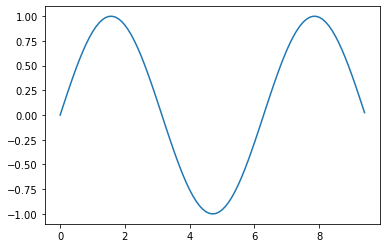

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)


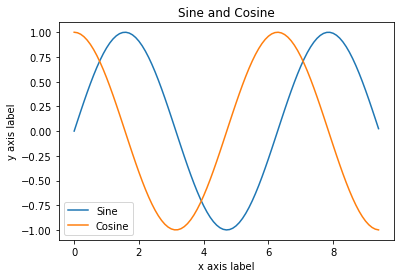

In [9]:

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

Text(0.5, 1.0, 'Cosine')

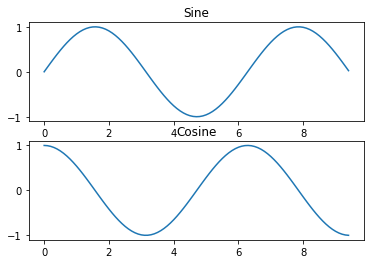

In [148]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')


# Exercise
plot a function of 3 connected lines

(100,)


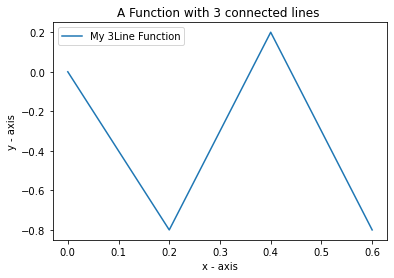

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# linspace: returns evenly spaced numbers over a specified interval
# for example from 0 to 0.2 with 100 digits between them
x1 = np.linspace(0,0.2,100) # linspace 
x2 = np.linspace(0.2,0.4,100)
x3 = np.linspace(0.4,0.6,100)
y1 = -4*x1 # y = -4x
y2 = 5*x2 - 1.8 # y = -5x-1.8
y3 = -5*x3+2.2 # y = -5x + 2.2
print(y3.shape) # 1D array
# hstack for 1-D arrays where it concatenates along the first axis
# so its basically the equivelant of np.concatenate
x_3 = np.hstack((x1,x2,x3)) # joins all the x arrays into one
y_3 = np.hstack((y1,y2,y3)) # joins all the y arrays into one
# plotting the line 1 points 
plt.plot(x_3, y_3, label = "My 3Line Function") # plots the function with an addition of a label :)
# Set the x axis label of the current axis.
plt.xlabel('x - axis') 
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('A Function with 3 connected lines ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


have 20 points on each line and add to linear part a random Gaussiaun noise with std 0.05.
plot the point as dots.

(20,)


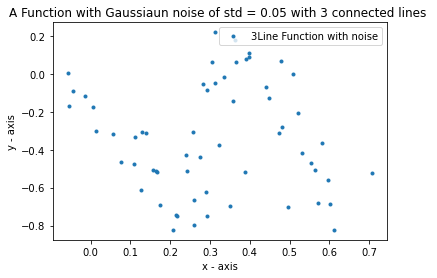

In [126]:
import matplotlib.pyplot as plt
import numpy as np

mean = 0.0   # some constant
std = 0.05   # some constant (standard deviation)
# linspace: returns evenly spaced numbers over a specified interval
# for example from 0 to 0.2 with 100 digits between them
x1 = np.linspace(0,0.2,20) # each line has 20 points 
x2 = np.linspace(0.2,0.4,20) # each line has 20 points 
x3 = np.linspace(0.4,0.6,20) # each line has 20 points 
y1 = -4*x1 # y = -4x
y2 = 5*x2 - 1.8 # y = -5x-1.8
y3 = -5*x3+2.2 # y = -5x + 2.2
print(y3.shape) # 1D array
# hstack for 1-D arrays where it concatenates along the first axis
# so its basically the equivelant of np.concatenate
x_3 = np.hstack((x1,x2,x3)) # joins all the x arrays into one
y_3 = np.hstack((y1,y2,y3)) # joins all the y arrays into one

# Draw random samples from a normal (Gaussian) distribution.
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
noisy_x3 = x_3 + np.random.normal(mean, std, x_3.shape)
noisy_y3 = y_3 + np.random.normal(mean, std, y_3.shape)

# plotting the line 1 points 
plt.plot(noisy_x3, noisy_y3, '.', label = "3Line Function with noise") # plots the function with dots 
# Set the x axis label of the current axis.
plt.xlabel('x - axis') 
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('A Function with Gaussiaun noise of std = 0.05 with 3 connected lines ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


plot a function of a line and then connected to a sin and then another line connected.

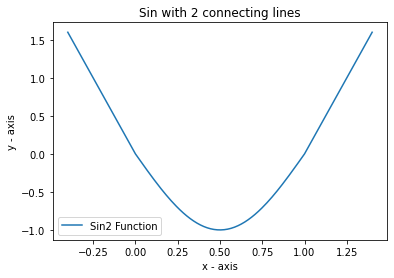

In [122]:
import numpy as np 
import matplotlib.pyplot as plt

x1 = np.linspace(-0.4,0,100)
x2 = np.linspace(0,1,100) 
x3 = np.linspace(1,1.4,100)
y1 = -4*x1
y2 = -np.sin(np.pi * x2) # calculate y points for sin
y3 = 4*x3-4

x_3 = np.hstack((x1,x2,x3))
y_3 = np.hstack((y1,y2,y3))
plt.xlabel('x - axis') 
plt.ylabel('y - axis')
plt.title('Sin with 2 connecting lines')
plt.plot(x_3,y_3,label = "Sin2 Function")
plt.legend()


add noise with std=0.3 (in lesson the std was 0.03 therfore i did accordingly 0.003)

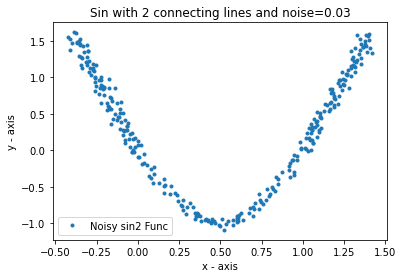

In [168]:
import numpy as np 
import matplotlib.pyplot as plt

mean = 0   # some constant
std = 0.03    # some constant (standard deviation)

x1 = np.linspace(-0.4,0,100)
x2 = np.linspace(0,1,100) 
x3 = np.linspace(1,1.4,100)
y1 = -4*x1
y2 = -np.sin(np.pi * x2) # calculate y points for sin
y3 = 4*x3-4


x_3 = np.hstack((x1,x2,x3))
y_3 = np.hstack((y1,y2,y3))

noisy_x3 = x_3 + np.random.normal(mean, std, x_3.shape)
noisy_y3 = y_3 + np.random.normal(mean, std, y_3.shape)
plt.xlabel('x - axis') 
plt.ylabel('y - axis')
plt.title('Sin with 2 connecting lines and noise=0.03')
plt.plot(noisy_x3,noisy_y3,'.', label='Noisy sin2 Func')
plt.legend()


join those plots to  a 4*4 subplot. 

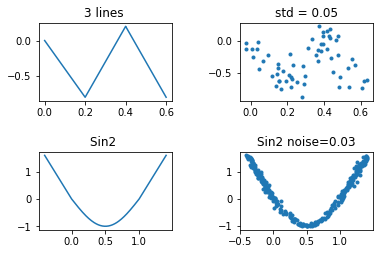

In [167]:
import matplotlib.pyplot as plt
import numpy as np

mean = 0.0   # some constant
std = 0.05    # some constant (standard deviation)

# Set up a subplot grid that has height 2 and width 2,
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=3.0) # this is just so there are spaces between the subplots

plt.subplot(2, 2, 1)
######### First Plot #############

x1 = np.linspace(0,0.2,100) 
x2 = np.linspace(0.2,0.4,100)
x3 = np.linspace(0.4,0.6,100)
y1 = -4*x1 
y2 = 5*x2 - 1.8 
y3 = -5*x3+2.2 
x_3 = np.hstack((x1,x2,x3)) 
y_3 = np.hstack((y1,y2,y3)) 
plt.plot(x_3, y_3)

plt.title('3 lines ')

plt.subplot(2, 2, 2)
####### Second Plot ############
x1 = np.linspace(0,0.2,20) 
x2 = np.linspace(0.2,0.4,20) 
x3 = np.linspace(0.4,0.6,20) 
y1 = -4*x1 
y2 = 5*x2 - 1.8 
y3 = -5*x3+2.2 
x_3 = np.hstack((x1,x2,x3)) 
y_3 = np.hstack((y1,y2,y3)) 
noisy_x3 = x_3 + np.random.normal(mean, std, x_3.shape)
noisy_y3 = y_3 + np.random.normal(mean, std, y_3.shape)
plt.plot(noisy_x3, noisy_y3, '.') # plots the function with dots 

plt.title('std = 0.05')


plt.subplot(2, 2, 3)
####### Third Plot ############


x1 = np.linspace(-0.4,0,100)
x2 = np.linspace(0,1,100) 
x3 = np.linspace(1,1.4,100)
y1 = -4*x1
y2 = -np.sin(np.pi * x2) # calculate y points for sin
y3 = 4*x3-4

x_3 = np.hstack((x1,x2,x3))
y_3 = np.hstack((y1,y2,y3))
plt.title('Sin2 ')
plt.plot(x_3,y_3)

plt.subplot(2, 2, 4)
####### Fourth Plot ############
std = 0.03    # some constant (standard deviation)

x1 = np.linspace(-0.4,0,100)
x2 = np.linspace(0,1,100) 
x3 = np.linspace(1,1.4,100)
y1 = -4*x1
y2 = -np.sin(np.pi * x2) # calculate y points for sin
y3 = 4*x3-4


x_3 = np.hstack((x1,x2,x3))
y_3 = np.hstack((y1,y2,y3))

noisy_x3 = x_3 + np.random.normal(mean, std, x_3.shape)
noisy_y3 = y_3 + np.random.normal(mean, std, y_3.shape)
plt.title('Sin2 noise=0.03')
plt.plot(noisy_x3,noisy_y3,'.')


